Importación de Bibliotecas:

In [391]:
import numpy as np
import matplotlib.pyplot as plt

Funciones de Runge-Kutta de Cuarto Orden:

rk4_step: Realiza un solo paso del método RK4.

rk4: Ejecuta múltiples pasos del método RK4 para integrar la EDO en el tiempo.

In [392]:
def rk4_step(y0, x0, f, h):
    ''' Realiza un paso del método de Runge-Kutta de cuarto orden.
        Inputs:
            y0 - Array numpy con las variables del sistema en el paso actual
            x0 - Paso de tiempo actual
            f  - Función que calcula las derivadas del sistema
            h  - Tamaño del paso de tiempo
        Output:
            yp1 - Array numpy con las variables del sistema en el siguiente paso
            xp1 - Paso de tiempo siguiente
    '''
    k1 = h * f(y0)
    k2 = h * f(y0 + k1/2)
    k3 = h * f(y0 + k2/2)
    k4 = h * f(y0 + k3)
    
    xp1 = x0 + h
    yp1 = y0 + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return yp1, xp1

def rk4(y0, x0, f, h, n):
    ''' Implementación del método RK4 para varios pasos.
        Inputs:
            y0 - Array numpy con las variables del sistema en el paso inicial
            x0 - Paso de tiempo inicial
            f  - Función que calcula las derivadas del sistema
            h  - Tamaño del paso de tiempo
            n  - Número de pasos
        Output:
            yn - Array numpy con los resultados de la integración para cada paso de tiempo
            xn - Array numpy con los valores de los pasos de tiempo
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for i in range(1, n+1):
        yn[i,:], xn[i] = rk4_step(y0 = yn[i-1,:], x0 = xn[i-1], f = f, h = h)
        
    return yn, xn

Constantes del Problema:

In [393]:
G = 1
m1 = 3
m2 = 4
m3 = 5

Condiciones Iniciales:

In [394]:
y1 = [0, 1]
v1 = [-0.46620368, -0.43236573]
y2 = [0.97000436, -0.24308753]
v2 = [-0.46620368, -0.43236573]
y3 = [0.0, 0.0]
v3 = [0.93240737, 0.86473146]

y0 = np.array(y1 + v1 + y2 + v2 + y3 + v3)

Definición de la Norma del Vector:

In [395]:
def norm_of_vector(x):
    return np.sqrt(x[0]**2 + x[1]**2)

Funciones Derivadas:
Estas funciones calculan las derivadas de las posiciones y velocidades de los cuerpos según las leyes gravitacionales.

In [396]:
# Derivadas de las posiciones y velocidades
def derivative_of_y1(y):
    v1 = y[2:4]
    return list(v1)

def derivative_of_v1(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m2*(y1 - y2)/norm_of_vector(y1-y2)**3 - G*m3*(y1 - y3)/norm_of_vector(y1-y3)**3)

def derivative_of_y2(y):
    v2 = y[6:8]
    return list(v2)

def derivative_of_v2(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m3*(y2 - y3)/norm_of_vector(y2-y3)**3 - G*m1*(y2 - y1)/norm_of_vector(y2-y1)**3)

def derivative_of_y3(y):
    v3 = y[10:12]
    return list(v3)

def derivative_of_v3(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m1*(y3 - y1)/norm_of_vector(y3-y1)**3 - G*m2*(y3 - y2)/norm_of_vector(y3-y2)**3)


Función de Derivadas del Sistema Completo:

In [397]:
def f(y):
    return np.array(derivative_of_y1(y) + derivative_of_v1(y) + derivative_of_y2(y) + derivative_of_v2(y) + derivative_of_y3(y) + derivative_of_v3(y))

Tamaño del Paso de Tiempo:

In [398]:
h = 0.0001

Integración del Sistema:

In [399]:
y, x = rk4(y0, 0, f, h, 4000)

Extracción de las Posiciones para la Gráfica:

In [400]:
pos1_x = []
pos1_y = []
pos2_x = []
pos2_y = []
pos3_x = []
pos3_y = []

for i in range(len(y)):
    pos1_x.append(y[i][0])
    pos1_y.append(y[i][1])
    pos2_x.append(y[i][4])
    pos2_y.append(y[i][5])
    pos3_x.append(y[i][8])
    pos3_y.append(y[i][9])


Gráfica de las Trayectorias:

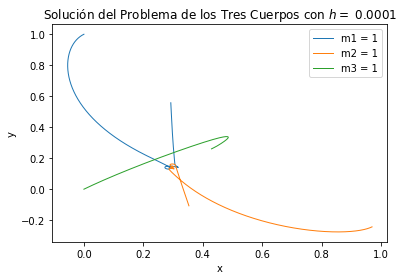

In [401]:
plt.title('Solución del Problema de los Tres Cuerpos con $h =$ ' + str(h))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(pos1_x, pos1_y, linewidth=1.0, linestyle="-", label='m1 = 1')
plt.plot(pos2_x, pos2_y, linewidth=1.0, linestyle="-", label='m2 = 1')
plt.plot(pos3_x, pos3_y, linewidth=1.0, linestyle="-", label='m3 = 1')
plt.legend()
plt.show()
